In [1]:
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langchain.messages import AnyMessage
from langchain.messages import HumanMessage
from typing import Annotated
from pydantic import BaseModel

In [2]:
class State(BaseModel):
    messages: Annotated[list[AnyMessage], add_messages]

In [3]:
import os
from dotenv import load_dotenv

load_dotenv()

os.environ['GROQ_API_KEY'] = os.getenv('GROQ_API_KEY')

In [4]:
from langchain_groq import ChatGroq


llm = ChatGroq(model="qwen/qwen3-32b")

In [5]:
def superbot(state: State):
    return {"messages": [llm.invoke(state.messages)]}

In [6]:
from langgraph.checkpoint.memory import MemorySaver
memory = MemorySaver()

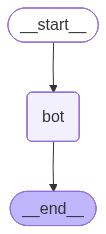

In [7]:
from IPython.display import display, Image
builder = StateGraph(State)

builder.add_node("bot", superbot)

builder.add_edge(START, "bot")
builder.add_edge("bot", END)

graph = builder.compile(checkpointer=memory)

display(Image(graph.get_graph().draw_mermaid_png()))

In [8]:
config = {"configurable": {"thread_id": "test"}}
msgs = graph.invoke({"messages": [HumanMessage(content="Hello, what's up?")]}, config=config)

for msg in msgs["messages"]:
    msg.pretty_print()

================================ Human Message =================================

Hello, what's up?
================================== Ai Message ==================================

<think>
Okay, the user asked "Hello, what's up?" which is a casual greeting. I should respond similarly to keep the conversation friendly. They might be looking for a simple reply or a chat. I'll ask how they're doing and offer help if needed.
</think>

Hello! I'm doing well, thank you for asking. How about you? If you have any questions or need help with something, feel free to let me know! 😊


In [9]:
# create thread
config = {"configurable": {"thread_id": "stream_test"}}

for chunk in graph.stream({"messages": ["My name is John Doe. I like indian cusine."]}, config=config, stream_mode="updates"):
    print(chunk)

{'bot': {'messages': [AIMessage(content="<think>\nOkay, the user introduced himself as John Doe and mentioned he likes Indian cuisine. I should respond in a friendly and engaging way. Let me start by acknowledging his introduction. Maybe ask a follow-up question to keep the conversation going. Since he likes Indian food, perhaps ask about his favorite dishes or if he's tried any specific regions' cuisine. I should keep it open-ended so he can elaborate. Also, maybe offer some recommendations if he's looking for new dishes. Need to make sure the tone is warm and inviting. Let me check for any cultural references or common Indian dishes to include examples. Avoid making assumptions but provide enough context. Alright, let's put it all together.\n</think>\n\nHello John Doe! It's great to meet you. I love that you enjoy Indian cuisine—it's such a rich and diverse culinary tradition! Do you have a favorite dish or regional specialty that you're particularly fond of? For example, do you enjo

In [10]:
# create thread
config = {"configurable": {"thread_id": "stream_test"}}

for chunk in graph.stream({"messages": ["Hello, who am I? And what you know about me"]}, config=config, stream_mode="updates"):
    print(chunk)

{'bot': {'messages': [AIMessage(content='<think>\nOkay, the user is asking, "Hello, who am I? And what you know about me." They mentioned their name is John Doe and they like Indian cuisine in the previous message. Let me start by recalling the conversation history to provide accurate information.\n\nFirst, I need to confirm their identity. Since they provided their name, I should acknowledge it and mention that I remember from the previous interaction. Then, for the second part, list what I know about them based on the history. They mentioned enjoying Indian cuisine, so I should highlight that. Also, they asked about favorite dishes and regions, so maybe I should invite them to share more if they want. \n\nWait, the user might be testing if the AI can remember past interactions. It\'s important to stay within the facts they provided. Don\'t assume anything else. Also, keep the tone friendly and open-ended to encourage them to provide more info if they\'re comfortable. \n\nI should str

In [11]:
for chunk in graph.stream({"messages": ["What's going on in the world?"]}, config=config, stream_mode="values"):
    print(chunk)

{'messages': [HumanMessage(content='My name is John Doe. I like indian cusine.', additional_kwargs={}, response_metadata={}, id='9deb8529-00b2-4bf5-bcca-582883a2482e'), AIMessage(content="<think>\nOkay, the user introduced himself as John Doe and mentioned he likes Indian cuisine. I should respond in a friendly and engaging way. Let me start by acknowledging his introduction. Maybe ask a follow-up question to keep the conversation going. Since he likes Indian food, perhaps ask about his favorite dishes or if he's tried any specific regions' cuisine. I should keep it open-ended so he can elaborate. Also, maybe offer some recommendations if he's looking for new dishes. Need to make sure the tone is warm and inviting. Let me check for any cultural references or common Indian dishes to include examples. Avoid making assumptions but provide enough context. Alright, let's put it all together.\n</think>\n\nHello John Doe! It's great to meet you. I love that you enjoy Indian cuisine—it's such 

In [ ]:
config = {"configurable": {"thread_id": "thread_1"}}

async for event in graph.astream_events({"messages": [HumanMessage(content="Hello, My name is John Doe. I like Cricket.")]}, config=config, version="v2"):
    print(event)

{'bot': {'messages': [AIMessage(content="<think>\nOkay, John Doe has mentioned his name and that he likes cricket again. I need to respond appropriately. Let me check the history.\n\nIn the previous message, he said the same thing, so maybe he's testing or just repeating. My first response was welcoming and asked about teams, players, and whether he plays or watches. Now he's responding again with the same message. \n\nHmm, maybe he's a bot or there's some error. But I should keep it friendly. Since he hasn't provided new info, I'll need to prompt him again. Let me ask more specific questions about cricket to encourage a detailed response. Maybe ask about his favorite aspect of the game or a memorable match he's watched. That could help move the conversation forward. I should also keep the tone positive and engaging.\n</think>\n\nHello again, John! 😊 I'm curious—what's your favorite part about cricket? Is it the strategic gameplay, the thrill of a close match, or maybe the camaraderie 